In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Users\DELL\Desktop\ML\Projects & Datasets\Kaggle Chess Dataset\games.csv')
df.head()

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

In [3]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [4]:
df.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000

In [5]:
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

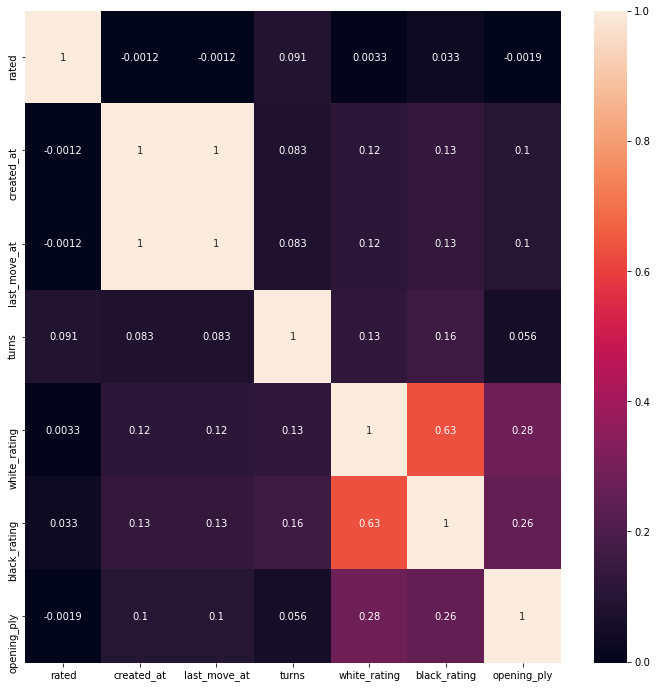

In [6]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)

# EDA

###  Percentage of rated games

([<matplotlib.patches.Wedge at 0x277462dc340>,
 [Text(-0.900787209778242, 0.631333828255646, 'Rated'),
  Text(0.9007872393331104, -0.6313337860867528, 'Not Rated')],
 [Text(-0.49133847806085923, 0.3443639063212614, '80.5%\n(16155 g)'),
  Text(0.49133849418169656, -0.34436388332004697, '19.5%\n(3902 g)')])

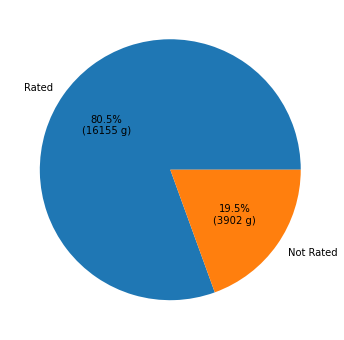

In [7]:
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig = plt.figure(figsize = (6, 6))
plt.pie(df['rated'].value_counts(), labels = ['Rated', 'Not Rated'], autopct = lambda pct: func(pct, df['rated'].value_counts()))

## Distribution of number of turns taken

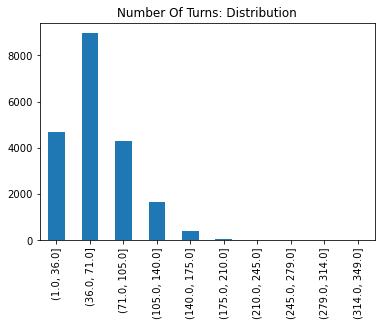

In [8]:
ax = pd.cut(df['turns'], 10, precision=0).value_counts().sort_index().plot.bar()
ax_attr = ax.set(title = "Number Of Turns: Distribution")

### Game Status

([<matplotlib.patches.Wedge at 0x277463e6970>,
 [Text(-0.19163499088931965, 1.0831786695955798, 'Resign'),
  Text(-0.2506963861046614, -1.0710515029605545, 'Mate'),
  Text(0.9395340952862782, -0.5720801375634317, 'Out of Time'),
  Text(1.088943531617381, -0.15556987159686797, 'Draw')],
 [Text(-0.1045281768487198, 0.5908247288703162, '55.6%\n(11146 g)'),
  Text(-0.13674348332981529, -0.5842099107057569, '31.5%\n(6324 g)'),
  Text(0.5124731428834244, -0.3120437113982354, '8.4%\n(1679 g)'),
  Text(0.593969199064026, -0.08485629359829161, '4.5%\n(906 g)')])

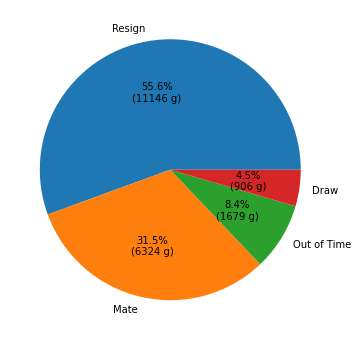

In [9]:
fig = plt.figure(figsize = (6, 6))
plt.pie(df['victory_status'].value_counts(), labels = ['Resign', 'Mate', 'Out of Time', 'Draw'], autopct = lambda pct: func(pct, df['victory_status'].value_counts()))

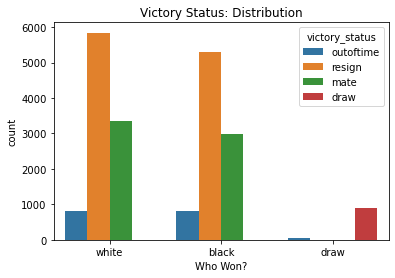

In [10]:
#games['victory_status'].value_counts().plot.bar()
ax = sns.countplot( x = 'winner', hue = 'victory_status', data = df)
ax_attr = ax.set(xlabel = 'Who Won?', title = 'Victory Status: Distribution')

You might be wondering about the small blue bar in the draw section due to timeout. In an online chess game both players have to make the first move in a minute otherwise the game aborts and it ends up in a draw. 

## Distribution of players rating

Average Rating of White is: 1596.6318675840064
Average rating of Black is: 1588.8319872370128


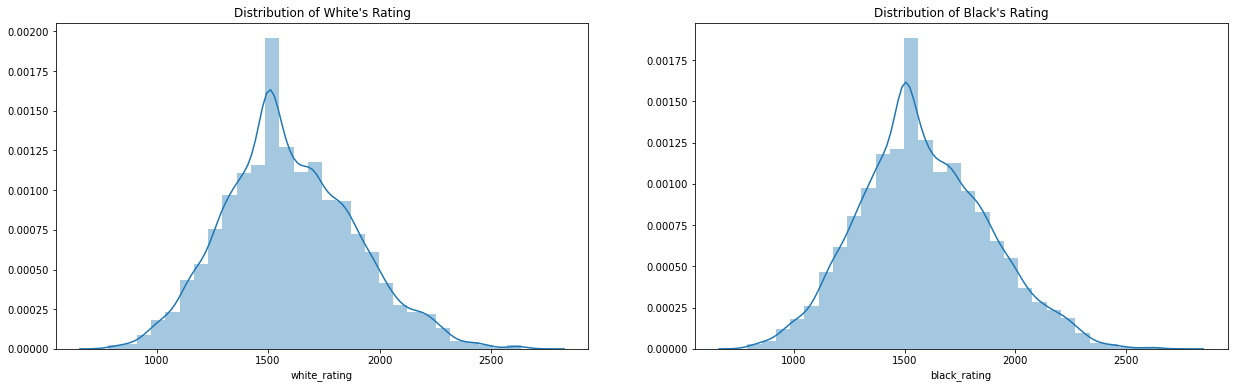

In [11]:
#a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize = (21, 6))

#Distribution of white's rating
sns.distplot(df['white_rating'], bins = 30, ax = ax[0])
#Distribution of black's rating
sns.distplot(df['black_rating'], bins = 30, ax = ax[1])

ax_attr = ax[0].set(title = "Distribution of White's Rating")
ax_attr = ax[1].set(title = "Distribution of Black's Rating")

#average rating of white
print('Average Rating of White is:', df['white_rating'].mean())

#average rating of black
print('Average rating of Black is:', df['black_rating'].mean())

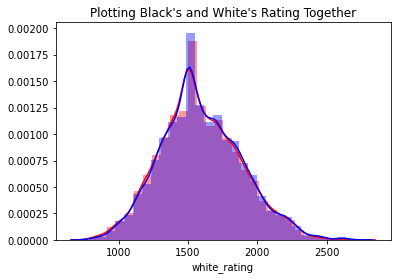

In [12]:
#plotting black and white together to compare the scale of their distribution
ax = sns.distplot(df['black_rating'], bins = 30, color = 'r')
ax1 = sns.distplot(df['white_rating'], bins = 30, color = 'b')
ax_attr = ax.set(title = "Plotting Black's and White's Rating Together")

From the above plot it is evident that the rating is similar hence no bias in the dataset.

### Does colour have a role in deciding the game???

([<matplotlib.patches.Wedge at 0x27746d327c0>,
 [Text(0.004824009568510416, 1.099989422190815, 'White'),
  Text(-0.1678393450515596, -1.0871200275280846, 'Black'),
  Text(1.0878456383046, -0.16307012976525642, 'Draw')],
 [Text(0.002631277946460226, 0.599994230285899, '49.9%\n(10001 g)'),
  Text(-0.09154873366448704, -0.5929745604698643, '45.4%\n(9107 g)'),
  Text(0.5933703481661454, -0.08894734350832167, '4.7%\n(949 g)')])

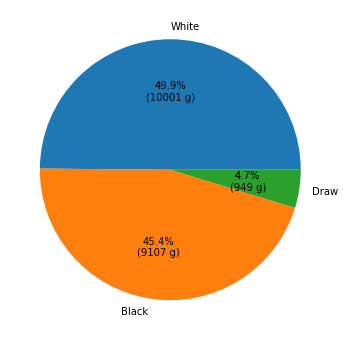

In [13]:
fig = plt.figure(figsize = (6, 6))
plt.pie(df['winner'].value_counts(), labels = ['White', 'Black', 'Draw'], autopct = lambda pct: func(pct, df['winner'].value_counts()))

Some experts believe that having white gives you a slight advantage over black.
We can see that from our data more games are won by players having white than by players having black, but this can be a random chance and to say anything with confidence we have to do more tests....

In [14]:
from scipy.stats import chisquare
stat, p = chisquare([10476, 9582])

# interpret p-value 
alpha = 0.01
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.7476179201940513e-10
Dependent (reject H0)


So the above results say that Yes white has an advantage over black as the results are statistically significant with a 99% confidence interval.

### Words by great players

"You will win with either color if you are the better player, but it takes longer with Black." — Isaac Kashdan

"When I am White I win because I am White. When I am Black I win because I am Bogoljubov." — Efim Bogoljubov

"To play for a draw, at any rate with White, is to some degree a crime against chess." — Mikhail Tal

In [17]:
rated.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  1.615500e+04  1.615500e+04  16155.000000  16155.000000  16155.000000   
mean   1.483600e+12  1.483601e+12     61.962550   1597.102012   1593.503188   
std    2.857839e+10  2.857839e+10     33.732775    284.178397    289.627160   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477393e+12  1.477394e+12     39.000000   1396.000000   1390.000000   
50%    1.496360e+12  1.496360e+12     57.000000   1577.000000   1573.000000   
75%    1.503260e+12  1.503260e+12     80.000000   1794.000000   1791.000000   
max    1.504493e+12  1.504494e+12    349.000000   2622.000000   2588.000000   

        opening_ply  
count  16155.000000  
mean       4.814361  
std        2.767543  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000

In [16]:
rated = df[df['rated'] == True]
white_df = rated[rated['winner'] == 'white']
white_df = white_df[white_df['white_rating'] <= white_df['black_rating']]
white_df.describe()

created_at  last_move_at        turns  white_rating  black_rating  \
count  2.811000e+03  2.811000e+03  2811.000000   2811.000000   2811.000000   
mean   1.484774e+12  1.484775e+12    62.434009   1536.712558   1640.023123   
std    2.770934e+10  2.770935e+10    33.778937    263.614375    264.444374   
min    1.376930e+12  1.376931e+12     1.000000    784.000000    841.000000   
25%    1.480006e+12  1.480008e+12    39.000000   1350.000000   1456.000000   
50%    1.496928e+12  1.496929e+12    57.000000   1518.000000   1614.000000   
75%    1.503396e+12  1.503402e+12    81.000000   1712.500000   1816.000000   
max    1.504492e+12  1.504493e+12   349.000000   2352.000000   2516.000000   

       opening_ply  
count  2811.000000  
mean      4.929918  
std       2.755467  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max      28.000000

In [18]:
black_df = rated[rated['winner'] == 'black']
black_df = black_df[black_df['white_rating'] >= black_df['black_rating']]
black_df.describe()

created_at  last_move_at        turns  white_rating  black_rating  \
count  2.658000e+03  2.658000e+03  2658.000000   2658.000000   2658.000000   
mean   1.483781e+12  1.483782e+12    64.145222   1647.637698   1544.953348   
std    2.911915e+10  2.911910e+10    32.667264    257.108495    261.108696   
min    1.377109e+12  1.377110e+12     1.000000    889.000000    789.000000   
25%    1.478710e+12  1.478710e+12    42.000000   1475.000000   1370.250000   
50%    1.497098e+12  1.497099e+12    59.500000   1629.500000   1530.000000   
75%    1.503340e+12  1.503340e+12    82.000000   1823.000000   1721.000000   
max    1.504487e+12  1.504487e+12   222.000000   2513.000000   2424.000000   

       opening_ply  
count  2658.000000  
mean      4.861926  
std       2.760298  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max      28.000000

### Do you have no chance of winning against a player with higher rating??

In [19]:
underdog = 0
for i in range(len(rated)):
    if(rated['winner'].iloc[i] == 'white' and rated['white_rating'].iloc[i] <= rated['black_rating'].iloc[i]):
        underdog += 1
    elif(rated['winner'].iloc[i] == 'black' and rated['black_rating'].iloc[i] <= rated['white_rating'].iloc[i]):
        underdog += 1
        
draw = 0
for i in range(len(rated)):
    if(rated['winner'].iloc[i] == 'draw'):
        draw += 1

print('UNDERDOG')
print(underdog/len(rated))
print('Draw')
print(draw/len(rated))
print('Total')
print((underdog+draw)/len(rated))

UNDERDOG
0.3385329619312906
Draw
0.04450634478489632
Total
0.3830393067161869


Players sometimes feel that they have no chance of defeating a player with rating higher than them, they become nervous and lose hope on seeing a high difference in the rating, but from these 20,000 games we can see that almost a third 33.85% of the games were won by players having a low rating than their opponent and if we also take into account the number of games that ended up in a draw we get almost 38.4% so it shows that rating is not something one should be worried about. Higher rated players can also fall into your traps and make blunders.

In [20]:
white_df['victory_status'].value_counts()

resign       1611
mate          955
outoftime     245
Name: victory_status, dtype: int64

In [21]:
black_df['victory_status'].value_counts()

resign       1555
mate          826
outoftime     277
Name: victory_status, dtype: int64

([<matplotlib.patches.Wedge at 0x27746cff970>,
 [Text(-0.26987288375726126, 1.0663810888291951, 'Resign'),
  Text(-0.05715933403234557, -1.0985139100316295, 'Mate'),
  Text(1.0509170046950838, -0.3249206814635129, 'Out of Time')],
 [Text(-0.14720339114032432, 0.5816624120886519, '57.9%\n(3166 g)'),
  Text(-0.03117781856309758, -0.5991894054717978, '32.6%\n(1780 g)'),
  Text(0.5732274571064092, -0.17722946261646155, '9.5%\n(521 g)')])

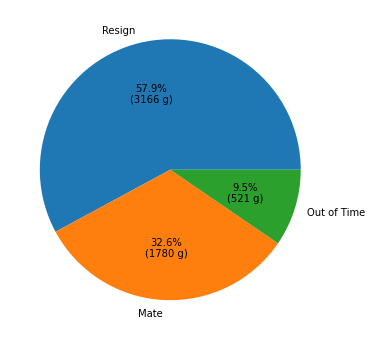

In [22]:
data = [1611+1555, 955+826, 245+277]
labels = ['Resign', 'Mate', 'Out of Time']
fig = plt.figure(figsize = (6, 6))
plt.pie(data, labels = labels, autopct = lambda pct: func(pct, data))

And from the graph you can see the wins were not just because of luck or running out of time (which is a major issue with me) in almost 58% of the games the opponent resigned and in 32% the underdog mated the opponent (Shear Domination)

In [23]:
count = 0
for i in range(len(white_df)):
    if(white_df['black_rating'].iloc[i] - white_df['white_rating'].iloc[i] >= 300):
        count += 1
        
print(count)

167


In [24]:
count = 0
for i in range(len(black_df)):
    if(black_df['white_rating'].iloc[i] - black_df['black_rating'].iloc[i] >= 300):
        count += 1
        
print(count)

158


In [25]:
pd.set_option('display.max_rows', None)

## Opening Distribution

In [50]:
opening_dist = df['opening_name'].value_counts()

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Opening Name')]

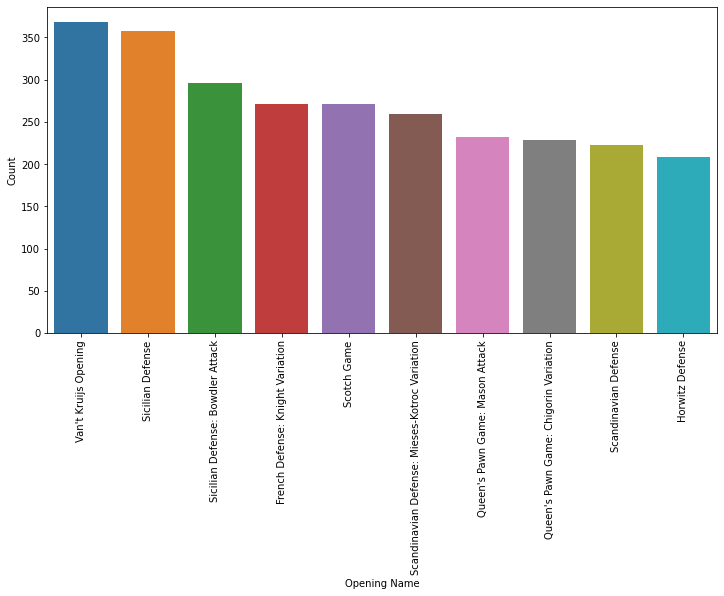

In [120]:
fig = plt.figure(figsize = (12,6))
chart = sns.barplot(x = opening_dist.index[:10], y = opening_dist[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(ylabel = 'Count',xlabel = 'Opening Name')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Opening Name')]

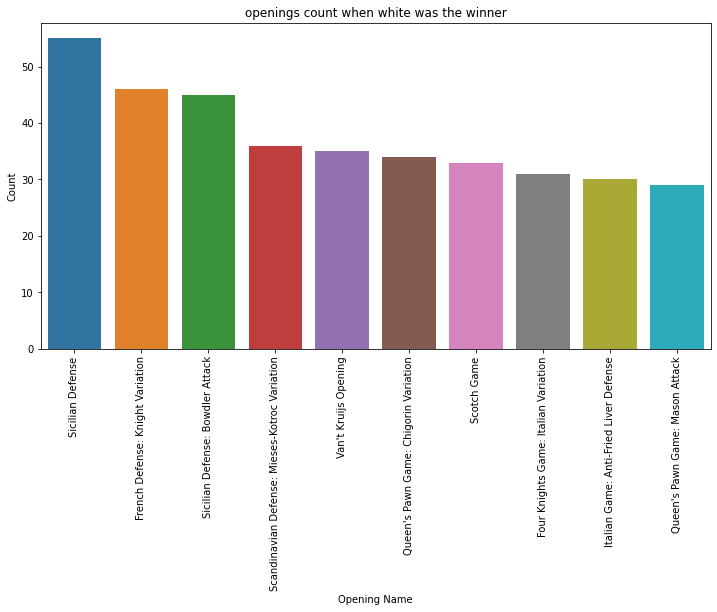

In [121]:
fig = plt.figure(figsize = (12,6))
white_openings = white_df['opening_name'].value_counts()
chart = sns.barplot(x = white_openings.index[:10], y = white_openings[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = 'openings count when white was the winner')
chart.set(ylabel = 'Count',xlabel = 'Opening Name')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Opening Name')]

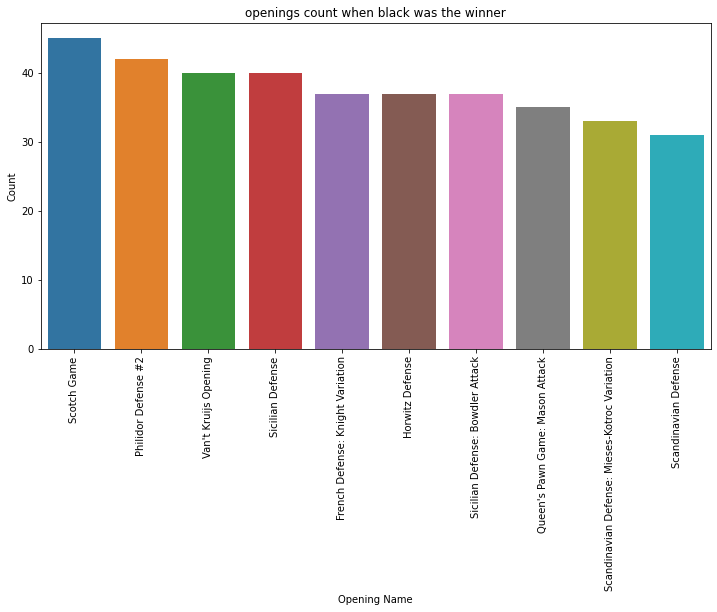

In [122]:
fig = plt.figure(figsize = (12,6))
black_openings = black_df['opening_name'].value_counts()
chart = sns.barplot(x = black_openings.index[:10], y = black_openings[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
ax_attr = chart.set(title = 'openings count when black was the winner')
chart.set(ylabel = 'Count',xlabel = 'Opening Name')

In [74]:
open_df = df[['opening_name', 'winner']].copy()
open_df['black'] = 0
open_df['white'] = 0
open_df['draw'] = 0
for i in range(len(open_df)):
    if(open_df['winner'][i] == 'black'):
       open_df['black'][i] = 1
    elif(open_df['winner'][i] == 'white'):
       open_df['white'][i] = 1
    else:
        open_df['draw'][i] = 1
        
open_df

<ipython-input-74-6d72c38efeb5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_df['white'][i] = 1
<ipython-input-74-6d72c38efeb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_df['black'][i] = 1
<ipython-input-74-6d72c38efeb5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_df['draw'][i] = 1


opening_name winner  black  white  \
0                       Slav Defense: Exchange Variation  white      0      1   
1                 Nimzowitsch Defense: Kennedy Variation  black      1      0   
2                  King's Pawn Game: Leonardis Variation  white      0      1   
3                 Queen's Pawn Game: Zukertort Variation  white      0      1   
4                                       Philidor Defense  white      0      1   
5                   Sicilian Defense: Mongoose Variation   draw      0      0   
6             Blackmar-Diemer Gambit: Pietrowsky Defense  white      0      1   
7      Nimzowitsch Defense: Kennedy Variation |  Link...  black      1      0   
8                  Italian Game: Schilling-Kostic Gambit  black      1      0   
9          Scandinavian Defense: Mieses-Kotroc Variation  white      0      1   
10                                  Van't Kruijs Opening  white      0      1   
11     French Defense: Advance Variation |  Paulsen A...  black      1      0   
12                      French Defense: Knight Variation  black      1      0   
13                                     French Defense #2  black      1      0   
14                  Four Knights Game: Italian Variation  white      0      1   
15     Italian Game: Two Knights Defense |  Knight At...  black      1      0   
16                  Four Knights Game: Italian Variation  black      1      0   
17                  Four Knights Game: Italian Variation  black      1      0   
18                                   Philidor Defense #3  black      1      0   
19                                     Queen's Pawn Game  white      0      1   
20                Italian Game: Anti-Fried Liver Defense  black      1      0   
21                                       Horwitz Defense  white      0      1   
22                      Sicilian Defense: Bowdler Attack  white      0      1   
23     English Opening: King's English Variation |  R...  white      0      1   
24               Sicilian Defense: Smith-Morra Gambit #2  black      1      0   
25                 Queen's Pawn Game: Chigorin Variation  white      0      1   
26                              Scotch Game: Haxo Gambit  white      0      1   
27                 Queen's Pawn Game: Chigorin Variation  black      1      0   
28                                          Slav Defense  black      1      0   
29              Queen's Gambit Refused: Marshall Defense  black      1      0   
30               Sicilian Defense: Smith-Morra Gambit #2  black      1      0   
31           Sicilian Defense: Canal Attack |  Main Line  black      1      0   
32                                      Sicilian Defense  white      0      1   
33     Queen's Gambit Accepted: Central Variation |  ...  black      1      0   
34                      Sicilian Defense: Bowdler Attack  white      0      1   
35                             Robatsch (Modern) Defense  black      1      0   
36          Blackmar-Diemer Gambit: Tartakower Variation  white      0      1   
37                                           Indian Game  black      1      0   
38     Sicilian Defense: Dragon Variation |  Yugoslav...  white      0      1   
39     English Opening: King's English Variation |  R...  white      0      1   
40                    Sicilian Defense: Dragon Variation   draw      0      0   
41                    Sicilian Defense: Closed Variation  black      1      0   
42               Sicilian Defense: Smith-Morra Gambit #2  white      0      1   
43     Sicilian Defense: Dragon Variation |  Yugoslav...  white      0      1   
44               Sicilian Defense: Smith-Morra Gambit #2  white      0      1   
45                      Sicilian Defense: Bowdler Attack  white      0      1   
46                                  Scandinavian Defense  black      1      0   
47                      Sicilian Defense: Bowdler Attack  white      0      1   
48     Sicilian Defense: Dragon Variation |  Yugoslav...  white      0     

In [75]:
df_open = open_df.groupby(['opening_name']).agg({
    'black' : sum,
    'white' : sum,
    'draw' : sum
})
df_open

black  white  draw
opening_name                                                          
Alekhine Defense                                       21     23     2
Alekhine Defense #2                                     1      1     1
Alekhine Defense #3                                     1      0     0
Alekhine Defense: Balogh Variation                      1      0     0
Alekhine Defense: Brooklyn Variation                    0      2     0
Alekhine Defense: Exchange Variation                    1      3     0
Alekhine Defense: Four Pawns Attack                     1      1     0
Alekhine Defense: Four Pawns Attack |  6...Nc6          0      1     0
Alekhine Defense: Four Pawns Attack |  Fianchet...      0      1     0
Alekhine Defense: Four Pawns Attack |  Main Line        0      1     0
Alekhine Defense: Four Pawns Attack |  Trifunov...      0      2     0
Alekhine Defense: John Tracy Gambit                     2      2     0
Alekhine Defense: Krejcik Variation                     1      1     0
Alekhine Defense: Maroczy Variation                     8     10     1
Alekhine Defense: Modern Variation |  Larsen Va...      1      2     0
Alekhine Defense: Modern Variation |  Larsen-Ha...      1      0     0
Alekhine Defense: Modern Variation |  Main Line         2      3     0
Alekhine Defense: Mokele Mbembe                         2      9     1
Alekhine Defense: Mokele Mbembe |  Vavra Defense        0      4     0
Alekhine Defense: Normal Variation                      9      7     1
Alekhine Defense: Saemisch Attack                       1      2     0
Alekhine Defense: Scandinavian Variation               17     13     3
Alekhine Defense: Scandinavian Variation |  Ges...      0      3     0
Alekhine Defense: Steiner Variation                     1      0     0
Alekhine Defense: The Squirrel                          1      3     0
Alekhine Defense: Two Pawn Attack                       6      8     0
Alekhine Defense: Two Pawn Attack |  Lasker Var...      1      1     1
Amar Opening                                            6      8     0
Amazon Attack                                           3      1     1
Amazon Attack: Siberian Attack                          0      1     0
Anderssen Opening                                       8     17     1
Australian Defense                                      0      1     0
Barnes Defense                                          4     11     1
Barnes Opening: Walkerling                              0      1     1
Benko Gambit                                            3      3     2
Benko Gambit Accepted |  Fianchetto Variation           0      2     0
Benko Gambit Accepted |  Fully Accepted Variation       2      1     0
Benko Gambit Accepted |  Modern Variation               0      1     0
Benko Gambit Accepted |  Pawn Return Variation          0      1     0
Benko Gambit Accepted |  Yugoslav |  without 7....      1      0     0
Benko Gambit Declined |  Hjoerring Countergambit        1      0     0
Benko Gambit Declined |  Main Line                      1      0     0
Benko Gambit Declined |  Quiet Line                     0      1     0
Benko Gambit: Zaitsev System                            1      0     0
Benoni Defense                                          4      2     0
Benoni Defense: Benoni Gambit Accepted                  9      7     6
Benoni Defense: Benoni Gambit |  Schlenker Defense      1      0     0
Benoni Defense: Benoni-Indian Defense                   2      2     0
Benoni Defense: Benoni-Indian Defense |  Kingsi...      1      3     0
Benoni Defense: Classical Variation                     2      2     0
Benoni Defense: Classical Variation |  Averbakh...      0      0     1
Benoni Defense: Classical Variation |  Main Line        1      0     0
Benoni Defense: Classical Variation |  New York...      1      2     0
Benoni Defense: Cormorant Gambit                        0      0     1
Benoni Defense: Czech Benoni Defense                    5      1     0
Benon

In [79]:
df_open['total'] = df_open['white'] + df_open['black'] + df_open['draw']
df_open = df_open[df_open['total'] >= 100]
df_open['perc_win'] = (df_open['white'] - df_open['black'])*100/(df_open['white'])
#df_open['perc_white'] = (df_open['white'])*100/(df_open['white']+df_open['black']+df_open['draw'])
df_open

<ipython-input-79-11203c991ca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['total'] = df_open['white'] + df_open['black'] + df_open['draw']


black  white  draw  total  \
opening_name                                                               
Bishop's Opening                                  51     69     8    128   
Caro-Kann Defense                                 83    109     7    199   
Four Knights Game: Italian Variation              74     95     7    176   
French Defense #2                                 53     48     5    106   
French Defense: Exchange Variation                42     58     9    109   
French Defense: Knight Variation                 121    135    15    271   
French Defense: Normal Variation                  49     76     4    129   
Giuoco Piano                                      56     46     6    108   
Horwitz Defense                                   94    110     5    209   
Hungarian Opening                                 66     61     3    130   
Indian Game                                      100     69    12    181   
Italian Game                                      35     62    12    109   
Italian Game: Anti-Fried Liver Defense            73     97    10    180   
King's Pawn Game: Leonardis Variation             83     67     4    154   
King's Pawn Game: McConnell Defense               50     46     4    100   
King's Pawn Game: Wayward Queen Attack            84     74     6    164   
Modern Defense                                    87     81     6    174   
Owen Defense                                      83     76     9    168   
Philidor Defense                                  42     84     9    135   
Philidor Defense #2                               96     89     8    193   
Philidor Defense #3                               67    127     4    198   
Pirc Defense #4                                   36     63     8    107   
Queen's Gambit Accepted: Old Variation            45     62     4    111   
Queen's Gambit Declined                           45     69     2    116   
Queen's Gambit Refused: Marshall Defense          41     84     2    127   
Queen's Pawn                                      39     85     5    129   
Queen's Pawn Game                                 83     53     6    142   
Queen's Pawn Game #2                              58     53     7    118   
Queen's Pawn Game: Chigorin Variation            109    112     8    229   
Queen's Pawn Game: Mason Attack                  103    116    13    232   
Queen's Pawn Game: Zukertort Variation            44     63     7    114   
Ruy Lopez: Steinitz Defense                       61     67     6    134   
Scandinavian Defense                             123     90    10    223   
Scandinavian Defense: Mieses-Kotroc Variation     89    164     6    259   
Scotch Game                                      115    145    11    271   
Sicilian Defense                                 194    149    15    358   
Sicilian Defense: Bowdler Attack                 164    119    13    296   
Sicilian Defense: Old Sicilian                    93     60     6    159   
Sicilian Defense: Smith-Morra Gambit #2           49     53     6    108   
Van't Kruijs Opening                             226    126    16    368   

                                               perc_white   perc_win  
opening_name                                                          
Bishop's Opening                                26.086957  26.086957  
Caro-Kann Defense                               23.853211  23.853211  
Four Knights Game: Italian Variation            22.105263  22.105263  
French Defense #2                              -10.416667 -10.416667  
French Defense: Exchange Variation              27.586207  27.586207  
French Defense: Knight Variation                10.370370  10.370370  
French Defense: Normal Variation                35.526316  35.526316  
Giuoco Piano                                   -21.739130 -21.739130  
Horwitz Defense                                 14.545455  14.545455  
Hungarian Opening                               -8.196721  -8.196721  
In

In [95]:
alpha = 0.05
eff_openings = []
for i in range(len(df_open)):
    stat, p = chisquare([df_open['white'][i], df_open['black'][i]])
    if p <= alpha:
        eff_openings.append([df_open.index[i], df_open['perc_win'][i]])
            
eff_openings

[['French Defense: Normal Variation', 35.526315789473685],
 ['Indian Game', -44.927536231884055],
 ['Italian Game', 43.54838709677419],
 ['Philidor Defense', 50.0],
 ['Philidor Defense #3', 47.24409448818898],
 ['Pirc Defense #4', 42.857142857142854],
 ["Queen's Gambit Declined", 34.78260869565217],
 ["Queen's Gambit Refused: Marshall Defense", 51.19047619047619],
 ["Queen's Pawn", 54.11764705882353],
 ["Queen's Pawn Game", -56.60377358490566],
 ['Scandinavian Defense', -36.666666666666664],
 ['Scandinavian Defense: Mieses-Kotroc Variation', 45.73170731707317],
 ['Sicilian Defense', -30.201342281879196],
 ['Sicilian Defense: Bowdler Attack', -37.81512605042017],
 ['Sicilian Defense: Old Sicilian', -55.0],
 ["Van't Kruijs Opening", -79.36507936507937]]

In [100]:
eff_openings = pd.DataFrame(eff_openings)
eff_openings.sort_values(by=[1], inplace = True)
eff_openings_white = eff_openings[eff_openings[1] > 0]
eff_openings_black = eff_openings[eff_openings[1] < 0]

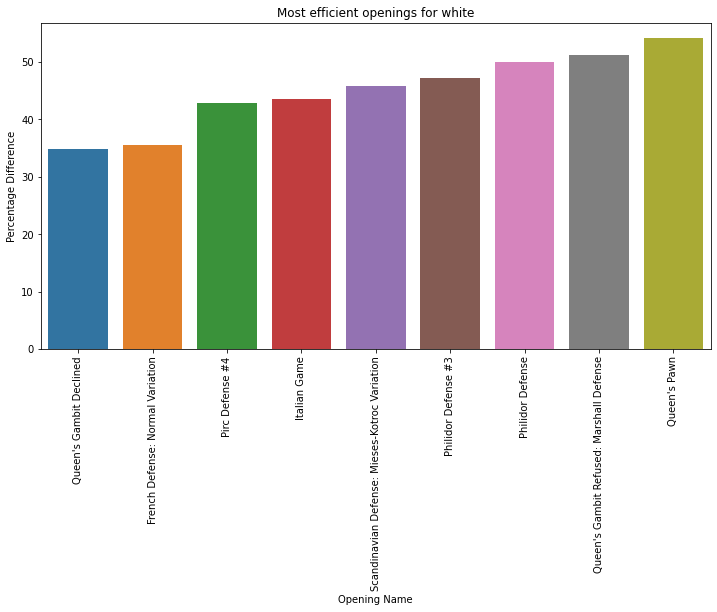

In [115]:
fig = plt.figure(figsize = (12,6))
chart1 = sns.barplot(x = eff_openings_white[0], y = eff_openings_white[1])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
ax_attr = chart1.set(title = 'Most efficient openings for white', xlabel = 'Opening Name', ylabel = 'Percentage Difference')

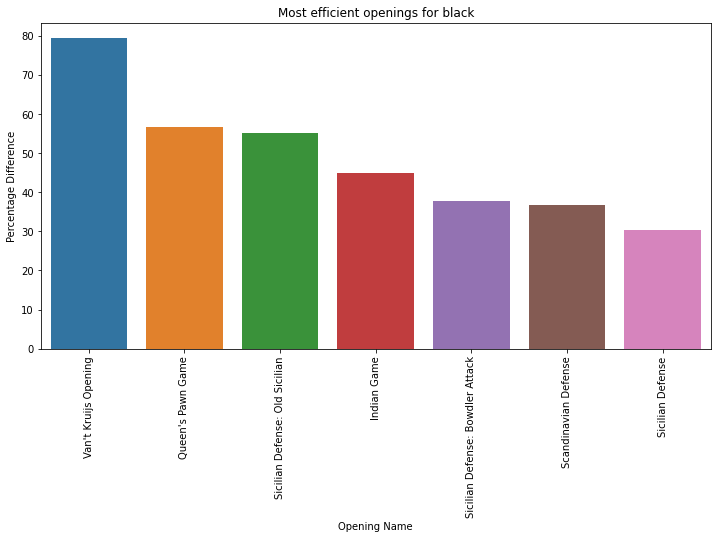

In [116]:
fig = plt.figure(figsize = (12,6))
chart2 = sns.barplot(x = eff_openings_black[0], y = (-1)*eff_openings_black[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax_attr = chart2.set(title = 'Most efficient openings for black', xlabel = 'Opening Name', ylabel = 'Percentage Difference')